In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
policy = pd.read_csv("insurance.csv")
policy

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [129]:
policy.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\admin\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

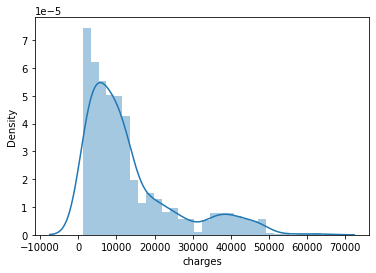

In [130]:
sns.distplot(policy['charges'])

C:\Users\admin\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

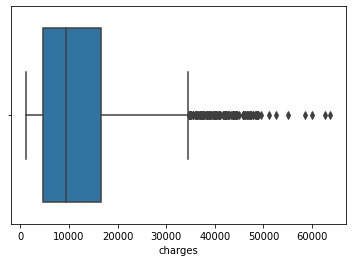

In [131]:
sns.boxplot(policy['charges'])

In [132]:
hp = sorted(policy['charges'])
q1, q3= np.percentile(hp,[25,75])
lower_bound = q1 -(1.5 * (q3-q1)) 
upper_bound = q3 + (1.5 * (q3-q1))
below = policy['charges'] > lower_bound
above = policy['charges'] < upper_bound
new_policy = policy[below & above]


In [133]:
new_policy.shape

(1199, 7)

C:\Users\admin\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

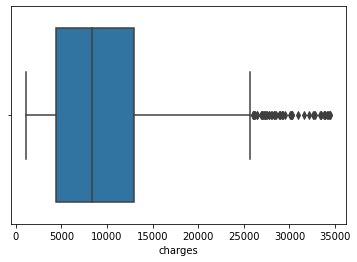

In [134]:
sns.boxplot(new_policy['charges'])

In [136]:
plan = pd.get_dummies(data=new_policy)
plan.head(5)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [137]:
x = plan.drop('charges',axis=1)
y = plan.charges

In [138]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=100) 

In [139]:
print(plan.shape)
print(x_train.shape)
print(x_test.shape)

(1199, 12)
(959, 11)
(240, 11)


In [140]:
model = LinearRegression().fit(x_train,y_train)
print (model.score(x_test,y_test))
print(1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

0.6192966378869835
0.6009293704166186


Text(0, 0.5, 'residuals')

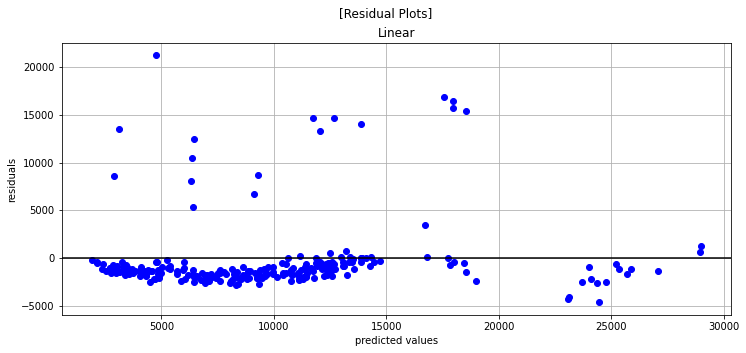

In [153]:
fig, axes = plt.subplots(1, 1, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes.plot(model.predict(x_test), y_test-model.predict(x_test), 'bo')
axes.axhline(y=0, color='k')
axes.grid()
axes.set_title('Linear')
axes.set_xlabel('predicted values')
axes.set_ylabel('residuals')

In [141]:
fruits =5
MVIF=5
trainx_copy = x
counter =1
highercolumns =[]
while(fruits >= nuts):
    orange = pd.DataFrame()
    orange['VIF'] = [variance_inflation_factor(trainx_copy.values, i) for i in range(trainx_copy.values.shape[1])]
    orange["Column Name"] = trainx_copy.columns
    orange.dropna(inplace = True)
    apple = orange.sort_values(['VIF'])[-1:]["Column Name"].values[0]
    fruits = orange.sort_values(['VIF'])[-1:]['VIF'].values[0]
    if(fruits >= MVIF):
        trainx_copy =trainx_copy.drop(apple, axis =1)
        highercolumns.append(apple)
    counter = counter+1


C:\Users\admin\miniconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\admin\miniconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [142]:
x_new = x.drop(highercolumns, axis=1)
new1= pd.DataFrame(x_new)
y =  plan.charges

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x.values,y,test_size = 0.20,random_state=100) 
model1 = LinearRegression().fit(x_train,y_train)
model1.score(x_test,y_test)

0.6192966378869834

In [145]:
print(1 - (1-model1.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

0.6009293704166185


In [152]:
import statsmodels.api as sm
x_new = x.drop(highercolumns, axis=1)
new1= pd.DataFrame(x_new)
y =  plan.charges
X2 = sm.add_constant(new1)
est = sm.OLS(y, new1)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.576
Model:                            OLS   Adj. R-squared (uncentered):              0.573
Method:                 Least Squares   F-statistic:                              269.6
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                   5.70e-218
Time:                        15:08:31   Log-Likelihood:                         -12478.
No. Observations:                1199   AIC:                                  2.497e+04
Df Residuals:                    1193   BIC:                                  2.500e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [148]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
new1= pd.DataFrame(x_new)
y =  plan.charges
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=150)
ridgeReg = Ridge(alpha=0.00001, normalize=True)

ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_test)
score = ridgeReg.score(x_test,y_test)

C:\Users\admin\miniconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [149]:
score

0.6920605013425531

In [150]:
lassoReg = Lasso(alpha=0.0001)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_test)
lassoReg.score(x_test,y_test)

0.6920606856065208

In [161]:
print("all model score is")
print("simple linear regression",model.score(x_test,y_test))
print("after VIF simple linear regression" ,model1.score(x_test,y_test))
print("ridge regression",score)
print("lasso regression",lassoReg.score(x_test,y_test))

all model score is
simple linear regression 0.7005168571704388
after VIF simple linear regression 0.7005168571704388
ridge regression 0.6920605013425531
lasso regression 0.6920606856065208


C:\Users\admin\miniconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
